In [1]:
df <- read.csv("hotel_bookings.csv")

# Instalar el paquete psych si no está instalado
install.packages("psych")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘mnormt’, ‘GPArotation’




In [2]:
# Cargar los datos
hotel_data <- read.csv("hotel_bookings.csv", na.strings = "NULL", header = TRUE, stringsAsFactors = FALSE)  # Especificar que "NULL" debe ser interpretado como NA

str(hotel_data)

'data.frame':	119390 obs. of  32 variables:
 $ hotel                         : chr  "Resort Hotel" "Resort Hotel" "Resort Hotel" "Resort Hotel" ...
 $ is_canceled                   : int  0 0 0 0 0 0 0 0 1 1 ...
 $ lead_time                     : int  342 737 7 13 14 14 0 9 85 75 ...
 $ arrival_date_year             : int  2015 2015 2015 2015 2015 2015 2015 2015 2015 2015 ...
 $ arrival_date_month            : chr  "July" "July" "July" "July" ...
 $ arrival_date_week_number      : int  27 27 27 27 27 27 27 27 27 27 ...
 $ arrival_date_day_of_month     : int  1 1 1 1 1 1 1 1 1 1 ...
 $ stays_in_weekend_nights       : int  0 0 0 0 0 0 0 0 0 0 ...
 $ stays_in_week_nights          : int  0 0 1 1 2 2 2 2 3 3 ...
 $ adults                        : int  2 2 1 1 2 2 2 2 2 2 ...
 $ children                      : chr  "0" "0" "0" "0" ...
 $ babies                        : int  0 0 0 0 0 0 0 0 0 0 ...
 $ meal                          : chr  "BB" "BB" "BB" "BB" ...
 $ country                     

In [3]:
# Contar los valores nulos por columna
missing_values <- colSums(is.na(hotel_data))

# Mostrar las columnas que tienen valores faltantes
missing_values[missing_values > 0]

country   agent company 
    488   16340  112593

In [4]:
# Imputar valores faltantes:
# Moda
get_mode <- function(v) {
  uniqv <- unique(na.omit(v))  # Excluir NA
  return(uniqv[which.max(tabulate(match(v, uniqv)))])
}

# Datos de pais, segun la Moda
hotel_data$country[is.na(hotel_data$country)] <- get_mode(hotel_data$country)

# Eliminar columnas con demasiados valores faltantes: "agent" y "company"
hotel_data_clean <- hotel_data[, !(names(hotel_data) %in% c("agent", "company"))]

# Verificar los datos después de imputación y eliminación
summary(hotel_data_clean)

    hotel            is_canceled       lead_time   arrival_date_year
 Length:119390      Min.   :0.0000   Min.   :  0   Min.   :2015     
 Class :character   1st Qu.:0.0000   1st Qu.: 18   1st Qu.:2016     
 Mode  :character   Median :0.0000   Median : 69   Median :2016     
                    Mean   :0.3704   Mean   :104   Mean   :2016     
                    3rd Qu.:1.0000   3rd Qu.:160   3rd Qu.:2017     
                    Max.   :1.0000   Max.   :737   Max.   :2017     
 arrival_date_month arrival_date_week_number arrival_date_day_of_month
 Length:119390      Min.   : 1.00            Min.   : 1.0             
 Class :character   1st Qu.:16.00            1st Qu.: 8.0             
 Mode  :character   Median :28.00            Median :16.0             
                    Mean   :27.17            Mean   :15.8             
                    3rd Qu.:38.00            3rd Qu.:23.0             
                    Max.   :53.00            Max.   :31.0             
 stays_in_weekend_ni

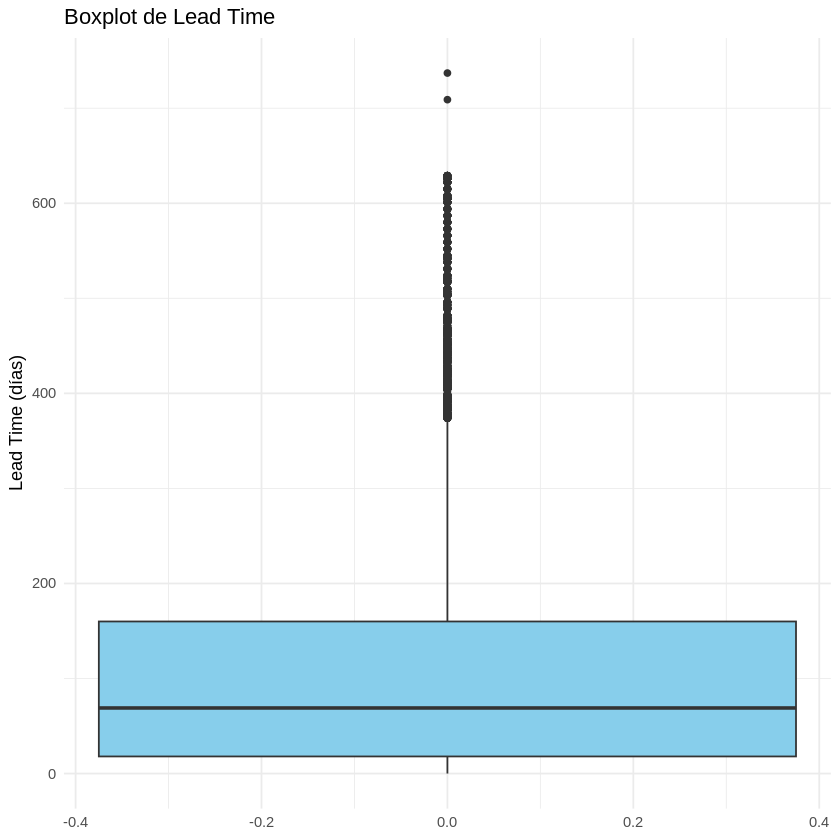

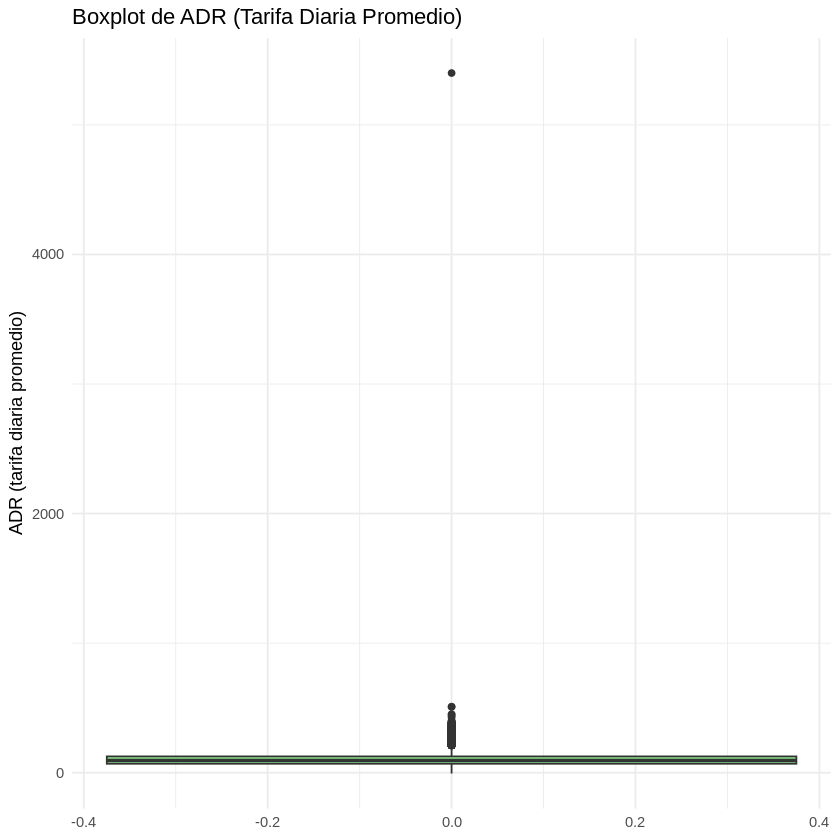

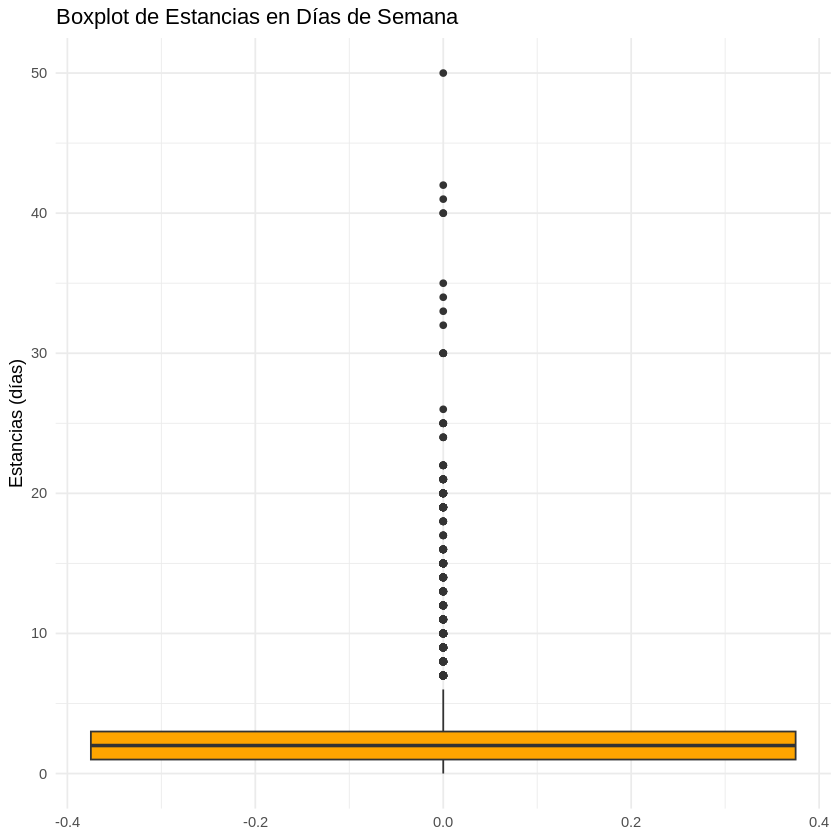

In [5]:
library(ggplot2)

# Crear un boxplot para la variable "lead_time" (días antes de la llegada)
ggplot(hotel_data, aes(y = lead_time)) +
  geom_boxplot(fill = "skyblue") +
  labs(title = "Boxplot de Lead Time", y = "Lead Time (días)") +
  theme_minimal()

# Crear un boxplot para la variable "adr" (tarifa diaria promedio)
ggplot(hotel_data, aes(y = adr)) +
  geom_boxplot(fill = "lightgreen") +
  labs(title = "Boxplot de ADR (Tarifa Diaria Promedio)", y = "ADR (tarifa diaria promedio)") +
  theme_minimal()

# Crear un boxplot para la variable "stays_in_week_nights" (estancias durante la semana)
ggplot(hotel_data, aes(y = stays_in_week_nights)) +
  geom_boxplot(fill = "orange") +
  labs(title = "Boxplot de Estancias en Días de Semana", y = "Estancias (días)") +
  theme_minimal()

* Lead time (tiempo entre la reserva y la llegada): Es normal que algunas reservas se realicen con mucha anticipación (incluso meses antes), lo que genera valores atípicos. Sin embargo, estos valores pueden ser genuinos, ya que es razonable pensar que algunos clientes reservan con gran antelación.

* ADR (tarifa diaria promedio): Los valores extremos en las tarifas pueden reflejar eventos especiales, temporadas altas o promociones. Estos outliers podrían ser datos reales y, por tanto, eliminarlos podría distorsionar el análisis, ya que hay una variación natural en las tarifas de los hoteles.

* Stays in week nights (noches entre semana): Es posible que algunos huéspedes se queden por periodos largos (semanas o meses), lo cual puede parecer un outlier pero sigue siendo un comportamiento plausible en algunos casos, especialmente en estadías prolongadas en resorts.

In [10]:
library(psych)

# Winsorización para la variable "lead_time", limitando al percentil 1% y 99%
hotel_data$lead_time_winsorized <- winsor(hotel_data$lead_time, trim = 0.01)

# Winsorización para la variable "adr" (tarifa diaria promedio)
hotel_data$adr_winsorized <- winsor(hotel_data$adr, trim = 0.01)

# Winsorización para la variable "stays_in_week_nights" (noches entre semana)
hotel_data$stays_in_week_nights_winsorized <- winsor(hotel_data$stays_in_week_nights, trim = 0.01)

# Verificar los resultados
summary(hotel_data$lead_time_winsorized)
summary(hotel_data$adr_winsorized)
summary(hotel_data$stays_in_week_nights_winsorized)

# Guardar el archivo limpio
write.csv(hotel_data, "hotel_bookings_limpio.csv", row.names = FALSE)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
    0.0    18.0    69.0   103.4   160.0   444.0 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   0.00   69.29   94.58  101.46  126.00  252.00 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  0.000   1.000   2.000   2.479   3.000  10.000 

In [7]:
hotel_data_limpio <- read.csv("hotel_bookings_limpio.csv")

In [8]:
# Perdida de menos de 4%
((nrow(df)-nrow(hotel_data_limpio))/nrow(df))*100

[1] 0

**ANÁLISIS** **EDA**


PASO 1: Cargar y explorar los datos

In [9]:
# Cargar los datos
hotel_data <- read.csv("hotel_bookings.csv", na.strings = "NULL", header = TRUE, stringsAsFactors = FALSE)

# Ver la estructura
str(hotel_data)

'data.frame':	119390 obs. of  32 variables:
 $ hotel                         : chr  "Resort Hotel" "Resort Hotel" "Resort Hotel" "Resort Hotel" ...
 $ is_canceled                   : int  0 0 0 0 0 0 0 0 1 1 ...
 $ lead_time                     : int  342 737 7 13 14 14 0 9 85 75 ...
 $ arrival_date_year             : int  2015 2015 2015 2015 2015 2015 2015 2015 2015 2015 ...
 $ arrival_date_month            : chr  "July" "July" "July" "July" ...
 $ arrival_date_week_number      : int  27 27 27 27 27 27 27 27 27 27 ...
 $ arrival_date_day_of_month     : int  1 1 1 1 1 1 1 1 1 1 ...
 $ stays_in_weekend_nights       : int  0 0 0 0 0 0 0 0 0 0 ...
 $ stays_in_week_nights          : int  0 0 1 1 2 2 2 2 3 3 ...
 $ adults                        : int  2 2 1 1 2 2 2 2 2 2 ...
 $ children                      : chr  "0" "0" "0" "0" ...
 $ babies                        : int  0 0 0 0 0 0 0 0 0 0 ...
 $ meal                          : chr  "BB" "BB" "BB" "BB" ...
 $ country                     

PASO 2: Evaluaciones de la calidad de los datos

In [ ]:
missing_values = data.isnull().sum()
print(missing_values)

missing_percentage = (missing_values / len(data)) * 100
print(missing_percentage)

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

2.2. Eliminar duplicados

In [ ]:
duplicates = data.duplicated().sum()
print(f'Duplicados: {duplicates}')

df_limpio = data.drop_duplicates()

Duplicados: 0


PASO 3: ANÁLISIS UNIVARIADO

3.1. Distribución de variables categóricas

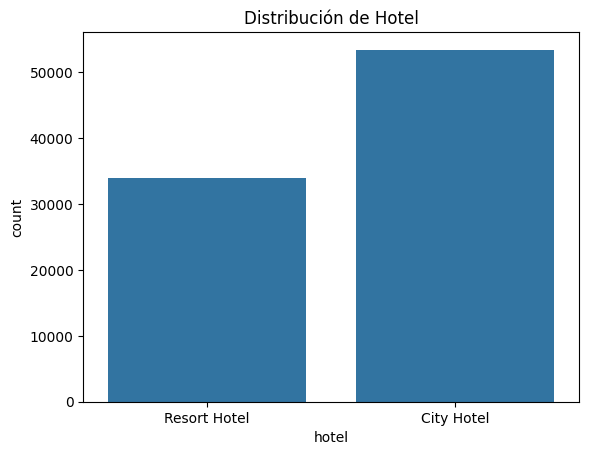

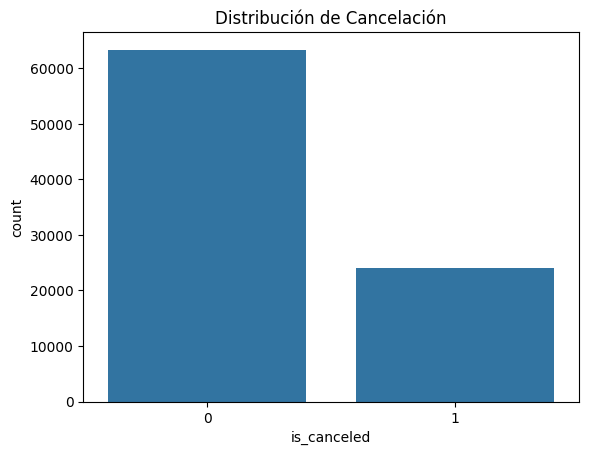

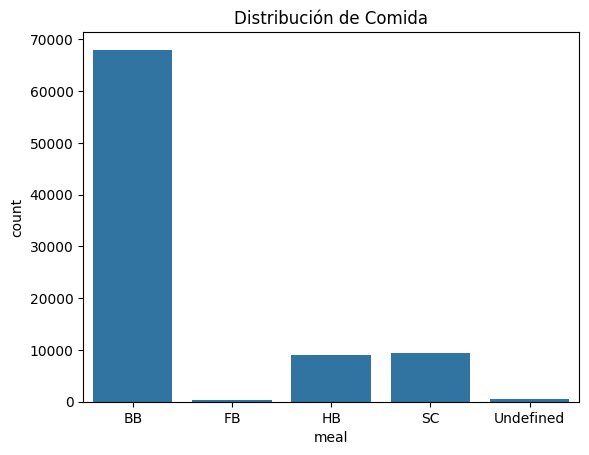

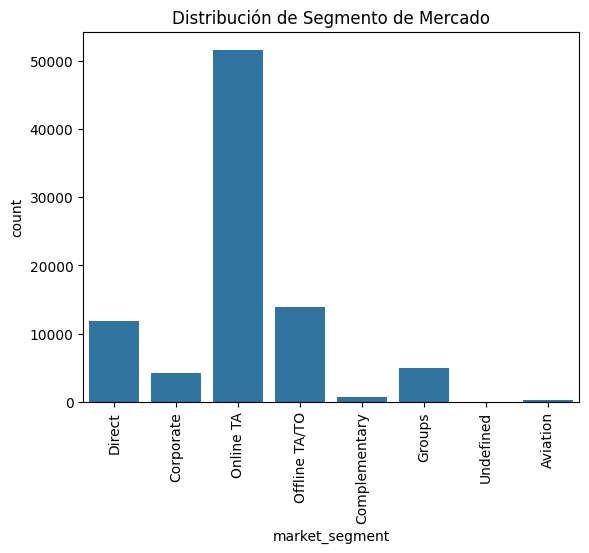

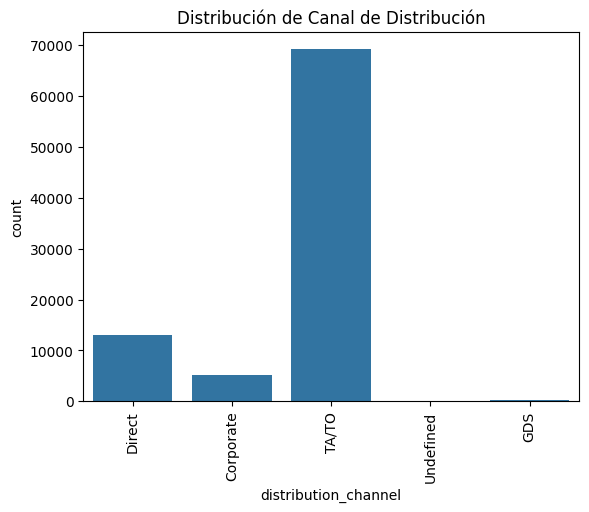

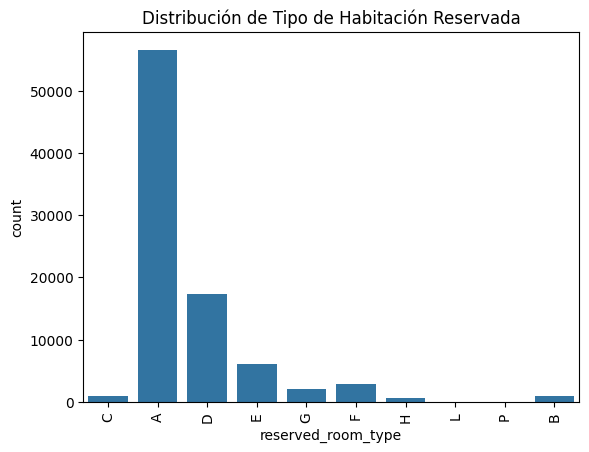

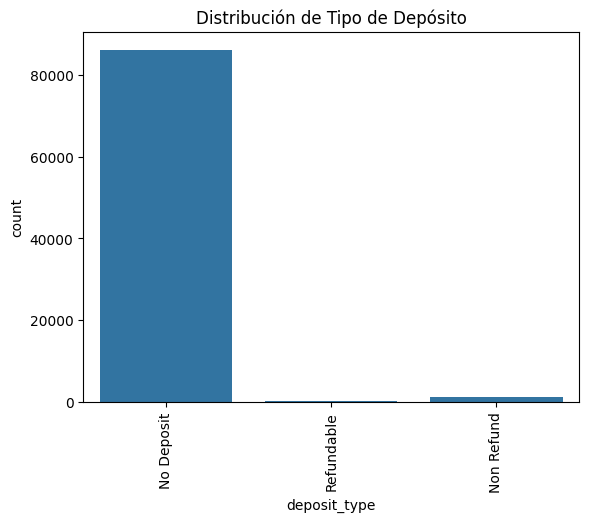

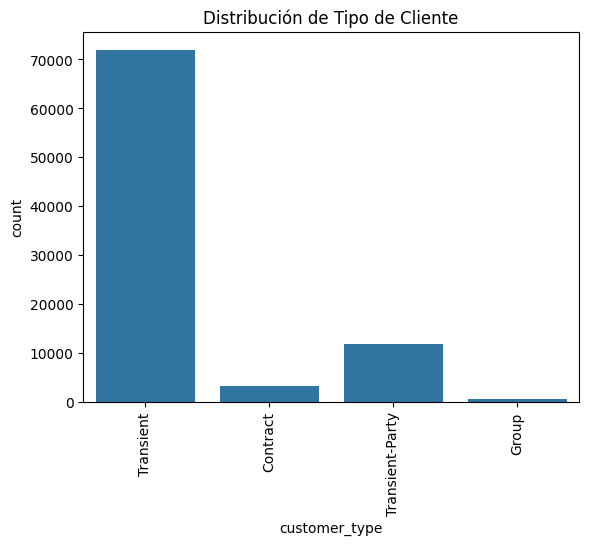

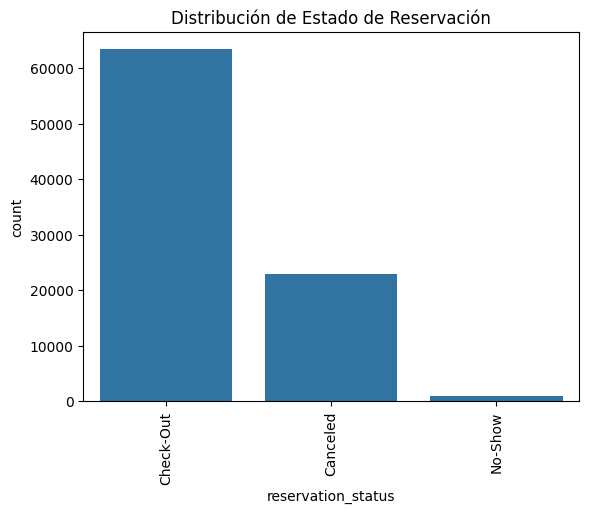

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='hotel', data=df_limpio)
plt.title('Distribución de Hotel')
plt.show()

sns.countplot(x='is_canceled', data=df_limpio)
plt.title('Distribución de Cancelación')
plt.show()

sns.countplot(x='meal', data=df_limpio)
plt.title('Distribución de Comida')
plt.show()

# Muy largo
# sns.countplot(x='country', data=df_limpio)
# plt.title('Distribución de País')
# plt.show()

sns.countplot(x='market_segment', data=df_limpio)
plt.title('Distribución de Segmento de Mercado')
plt.xticks(rotation=90)
plt.show()

sns.countplot(x='distribution_channel', data=df_limpio)
plt.title('Distribución de Canal de Distribución')
plt.xticks(rotation=90)
plt.show()

sns.countplot(x='reserved_room_type', data=df_limpio)
plt.title('Distribución de Tipo de Habitación Reservada')
plt.xticks(rotation=90)
plt.show()

sns.countplot(x='deposit_type', data=df_limpio)
plt.title('Distribución de Tipo de Depósito')
plt.xticks(rotation=90)
plt.show()

sns.countplot(x='customer_type', data=df_limpio)
plt.title('Distribución de Tipo de Cliente')
plt.xticks(rotation=90)
plt.show()

sns.countplot(x='reservation_status', data=df_limpio)
plt.title('Distribución de Estado de Reservación')
plt.xticks(rotation=90)
plt.show()

3.2. Distribución de valores numéricas

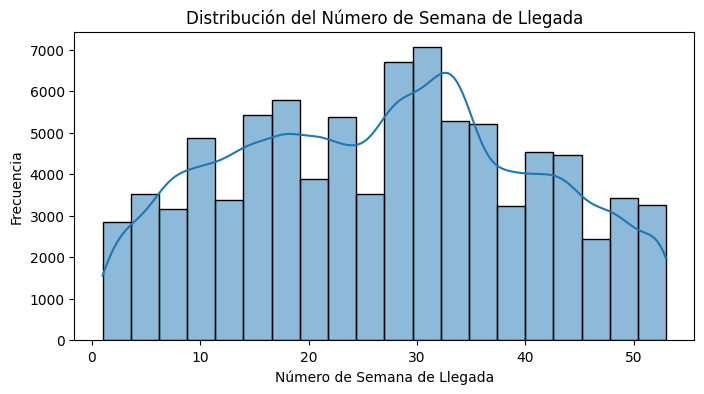

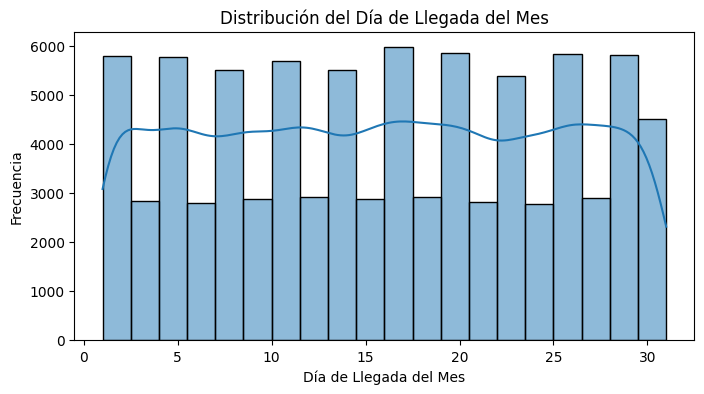

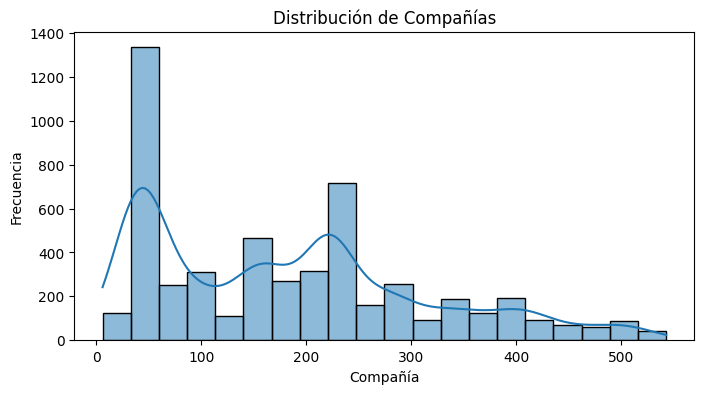

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# arrival_date_week_number
plt.figure(figsize=(8, 4))
sns.histplot(df_limpio['arrival_date_week_number'], bins=20, kde=True)
plt.title('Distribución del Número de Semana de Llegada')
plt.xlabel('Número de Semana de Llegada')
plt.ylabel('Frecuencia')
plt.show()

# arrival_date_day_of_month
plt.figure(figsize=(8, 4))
sns.histplot(df_limpio['arrival_date_day_of_month'], bins=20, kde=True)
plt.title('Distribución del Día de Llegada del Mes')
plt.xlabel('Día de Llegada del Mes')
plt.ylabel('Frecuencia')
plt.show()

# company
plt.figure(figsize=(8, 4))
sns.histplot(df_limpio['company'], bins=20, kde=True)
plt.title('Distribución de Compañías')
plt.xlabel('Compañía')
plt.ylabel('Frecuencia')
plt.show()


PASO 4: Tratamiento de valores nulos

4.1. Imputación de valores

In [ ]:
# Mediana para children
data['children'].fillna(data['children'].median(), inplace=True)

# Moda para country
from scipy import stats

# Función para obtener la moda
def get_mode(series):
    mode = series.mode()
    if len(mode) > 0:
        return mode[0]
    else:
        return None

# Reemplazar los valores nulos en la columna 'country' con la moda
data['country'].fillna(get_mode(data['country']), inplace=True)

# Eliminar agent y company
data.drop(columns=['agent', 'company'], inplace=True)

# Verificacion
print(data.isnull().sum())

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests   

PASO 5: Análisis bivariado

5.1. Cancelación por Hotel

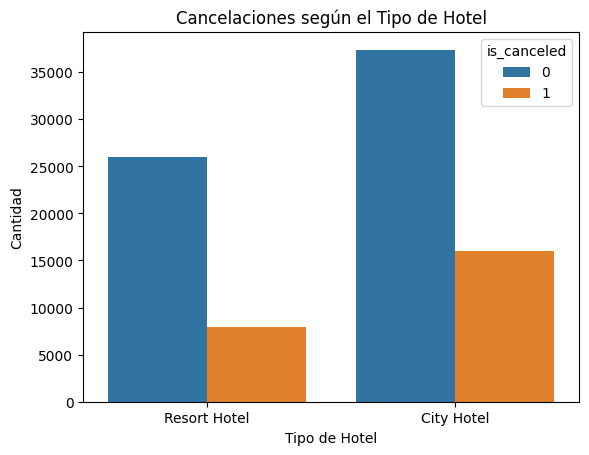

In [ ]:
# Gráfico de barras
sns.countplot(x='hotel', hue='is_canceled', data=data)
plt.title('Cancelaciones según el Tipo de Hotel')
plt.xlabel('Tipo de Hotel')
plt.ylabel('Cantidad')
plt.show()



5.2. ADR por Tipo de Hotel

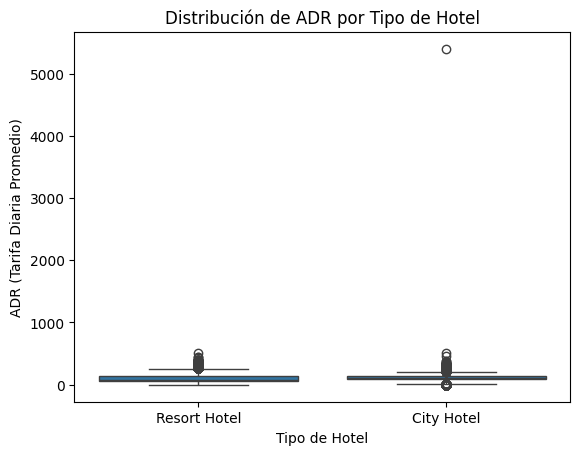

In [ ]:
# Gráfico de boxplot
sns.boxplot(x='hotel', y='adr', data=data)
plt.title('Distribución de ADR por Tipo de Hotel')
plt.xlabel('Tipo de Hotel')
plt.ylabel('ADR (Tarifa Diaria Promedio)')
plt.show()


Conclusión del EDA

Falta conclusión